In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys
from matplotlib import animation, rc
from IPython.display import HTML, Image

src_dir = os.path.abspath("/home/mmfarrugia/repos/optimization/hybrid_optimizer")
sys.path.append(src_dir)

from hybrid_optimizer import PSO_GA
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
import example_funcs

Himmelblau's  objective function

    Only takes two dimensions and has a four equal global minimums
     of zero at :code:`f([3.0,2.0])`, :code:`f([-2.805118,3.131312])`,
     :code:`f([-3.779310,-3.283186])`, and :code:`f([3.584428,-1.848126])`.
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[0,1000]`

best_x is  [3.00000046 2.0000042 ] best_y is [3.45570784e-10]


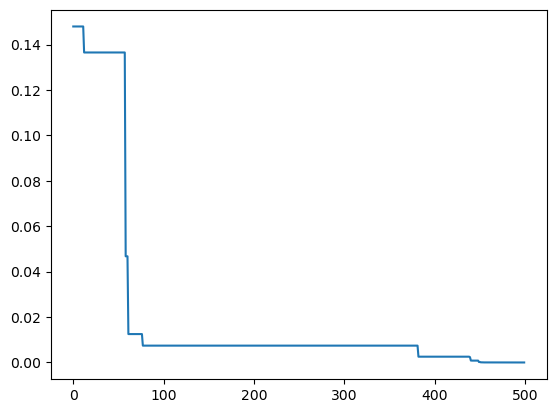

In [3]:
ho = PSO_GA(example_funcs.himmelblau, transform_func=False, taper_GA=True, taper_mutation=True, n_dim=2, lb=[-5., -5.], ub = [5., 5.], max_iter=500)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

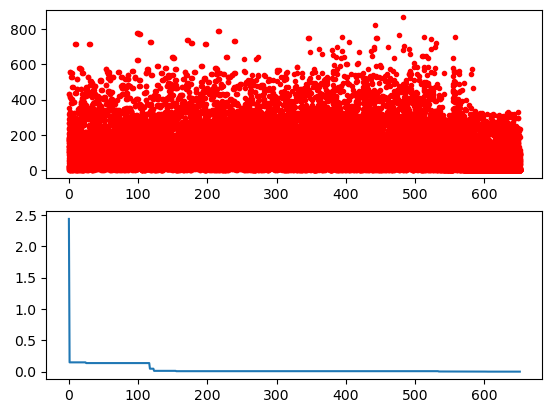

In [4]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [12]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.himmelblau, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (0,1000)], label=['x-axis', 'y-axis', 'z-axis'])

In [13]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d)


In [14]:
animation2D.save('himmelblau.gif', writer='ffmpeg', fps=15)

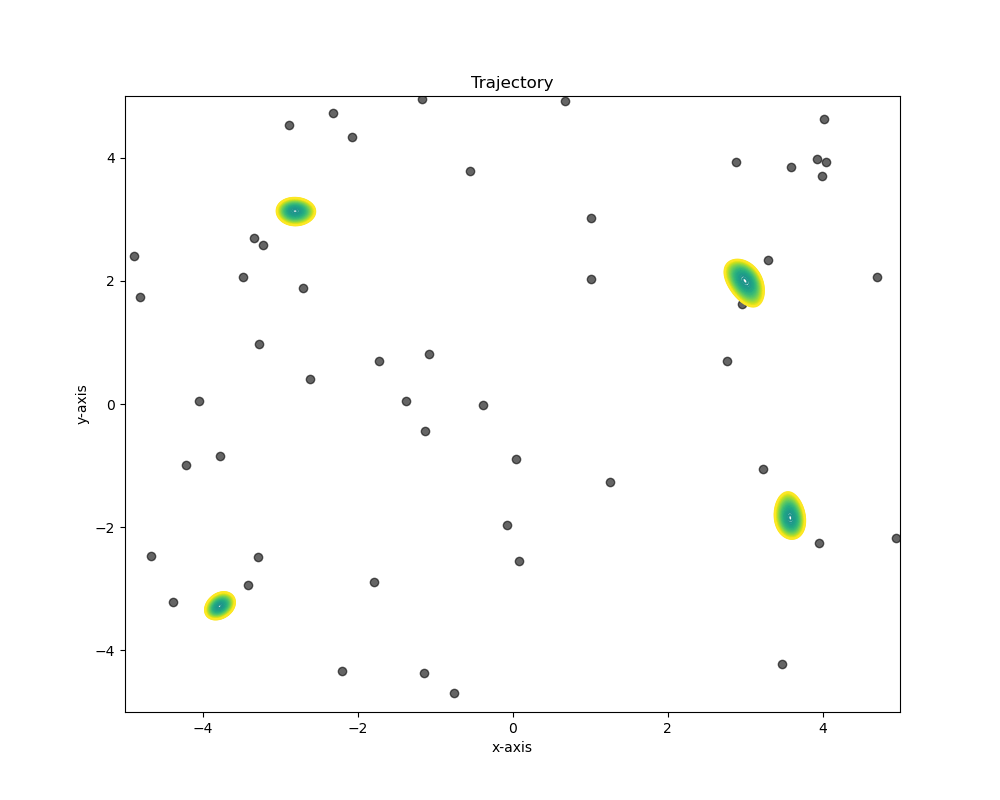

In [15]:
Image('himmelblau.gif')

In [16]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[-2.70537291e+00  1.88999481e+00  4.08248245e+01]
  [-3.47308039e+00  2.06043386e+00  4.85355448e+01]
  [-7.59151021e-01 -4.68514290e+00  4.29673024e+02]
  ...
  [-3.34027902e+00  2.70008132e+00  1.74670881e+01]
  [-1.13888847e+00 -4.37393466e+00  3.18991412e+02]
  [-1.08381310e+00  8.14083450e-01  1.36275356e+02]]

 [[ 2.22018947e+00  3.44289040e-01  5.45199449e+01]
  [ 4.63610890e+00  4.06779096e+00  4.13189762e+02]
  [-4.79977681e+00  2.21786554e+00  2.50571725e+02]
  ...
  [ 7.84110813e-01 -3.33230473e+00  2.12065238e+02]
  [ 8.90215354e-01 -4.92708599e+00  5.59073985e+02]
  [ 3.07359812e+00  4.60117537e+00  3.06661181e+02]]

 [[ 2.22018947e+00  3.44289040e-01  5.45199449e+01]
  [ 4.63610890e+00  4.06779096e+00  4.13189762e+02]
  [-4.79977681e+00  2.21786554e+00  2.50571725e+02]
  ...
  [ 7.84110813e-01 -3.33230473e+00  2.12065238e+02]
  [ 8.90215354e-01 -4.92708599e+00  5.59073985e+02]
  [ 3.07359812e+00  4.60117537e+00  3.06661181e+02]]

 ...

 [[ 2.99987503e+00  2.00006030e+00

In [17]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d)
plt.show()


In [18]:
animation3d.save('himmelblau_3d.gif', writer='ffmpeg', fps=15)
Image(url='himmelblau_3d.gif')

Matyas  objective function

    Only takes two dimensions and has a global minimum at
    :code:`f([0,0])`. Its coordinates are bounded within
    :code:`[-10,10]`.

best_x is  [-0.05487888  0.01148065] best_y is [0.00111973]


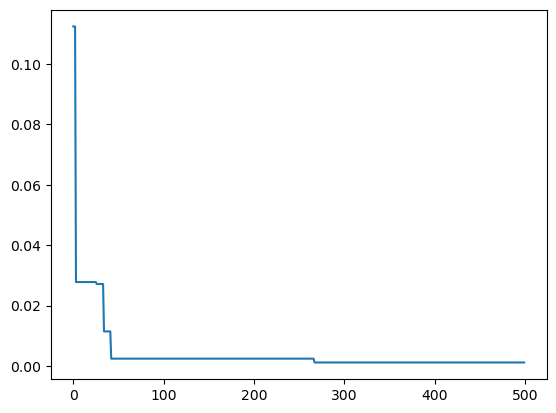

In [29]:
ho = PSO_GA(example_funcs.matyas, transform_func=False, n_dim=2, lb=[-10., -10.], ub = [10., 10.], max_iter=500)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

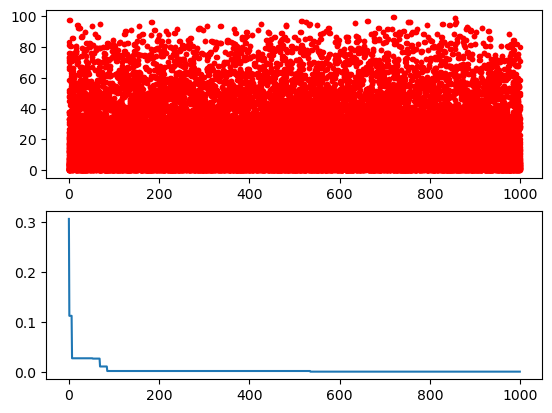

In [30]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [31]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.matyas, limits=[(-10,10), (-10,10)])
#Adjust figure limits
d = Designer(limits=[(-10,10), (-10,10), (0,10)], label=['x-axis', 'y-axis', 'z-axis'])

In [32]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, 0, 0))

animation2D.save('matyas.gif', writer='ffmpeg', fps=20)

In [33]:
Image(url='matyas.gif')

In [34]:
%%capture
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(-10, 1, 0))
plt.show()

In [35]:
animation3d.save('matyas_3d.gif', writer='ffmpeg', fps=20)
Image(url='matyas_3d.gif')

Three-Hump Camel  objective function

    Only takes two dimensions and has a global minimum of `0` at
    :code:`f([0, 0])`. Its coordinates are bounded within
    :code:`[-5, 5]`.

    Best visualized in the full domin and a range of :code:`[0, 2000]`.

best_x is  [0.00063544 0.02992134] best_y is [0.00091511]


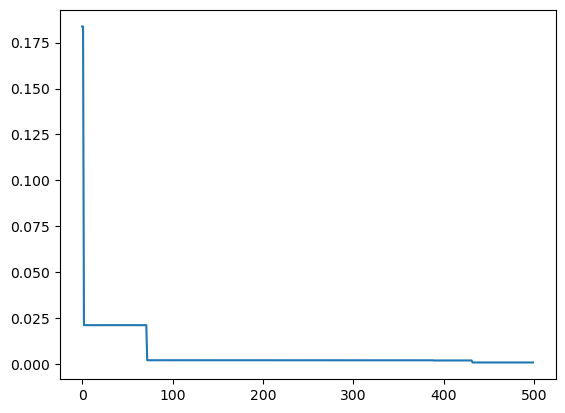

In [36]:
ho = PSO_GA(example_funcs.threehump, transform_func=False, n_dim=2, lb=[-5., -5.], ub = [5., 5.], max_iter=500)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

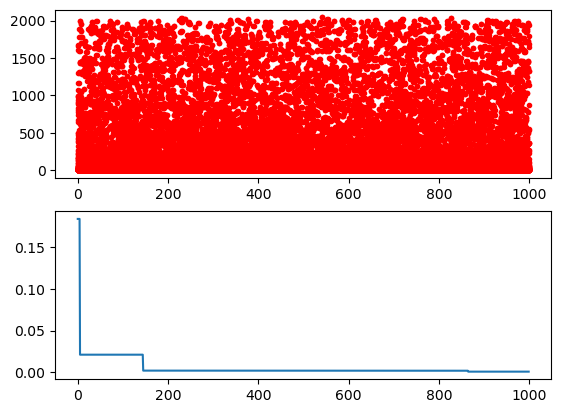

In [37]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [38]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.threehump, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (0,2000)], label=['x-axis', 'y-axis', 'z-axis'])

In [39]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, 0, 0))

animation2D.save('threehump.gif', writer='ffmpeg', fps=20)

In [40]:
Image(url='threehump.gif')

In [41]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[ 3.05756689e-01 -2.48669781e+00  5.60127513e+00]
  [-4.21175472e+00 -4.07416829e+00  6.69143732e+02]
  [-1.64579070e-01 -3.67637035e+00  1.41741581e+01]
  ...
  [ 4.43514683e+00  1.89876869e+00  9.13609934e+02]
  [-2.60582065e+00 -4.72883289e+00  5.20327708e+01]
  [ 7.35722424e-01  4.13893555e+00  2.09772606e+01]]

 [[ 3.63077587e+00  1.35965799e+00  2.32490527e+02]
  [ 2.18544223e+00 -3.27727988e-01  3.14992289e+00]
  [ 4.48772545e+00  6.07377965e-01  9.78951807e+02]
  ...
  [ 4.01874694e+00  1.16411351e+00  4.66549252e+02]
  [-7.57086991e-01 -3.85639496e+00  1.86241921e+01]
  [-2.54789107e-01 -2.51119595e+00  7.07138608e+00]]

 [[ 3.63077587e+00  1.35965799e+00  2.32490527e+02]
  [ 2.18544223e+00 -3.27727988e-01  3.14992289e+00]
  [ 4.48772545e+00  6.07377965e-01  9.78951807e+02]
  ...
  [ 4.01874694e+00  1.16411351e+00  4.66549252e+02]
  [-7.57086991e-01 -3.85639496e+00  1.86241921e+01]
  [-2.54789107e-01 -2.51119595e+00  7.07138608e+00]]

 ...

 [[ 4.07944612e+00  1.06285501e+00

In [42]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d)


In [43]:
animation3d.save('threehump_3d.gif', writer='ffmpeg', fps=15)
Image(url='threehump_3d.gif')

Easom's  objective function

    Only takes two dimensions and has a global minimum of
    `-1` at :code:`f([pi, pi])`.
    Its coordinates are bounded within :code:`[-100,100]`.

    Best visualized in the domain of :code:`[-5, 5]` and a range of :code:`[-1, 0.2]`.

best_x is  [3.1042457  3.38540316] best_y is [-0.91250938]


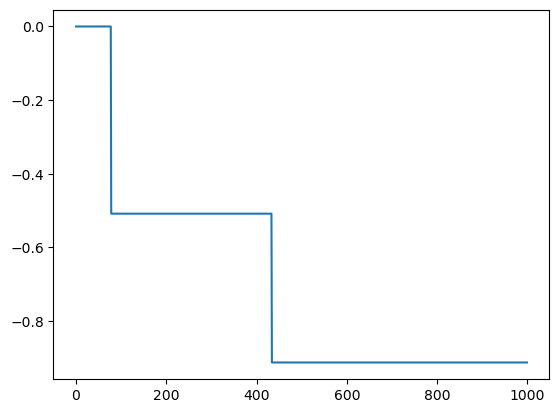

In [44]:
ho = PSO_GA(example_funcs.easom, transform_func=False, n_dim=2, lb=[-100., -100.], ub = [100., 100.], max_iter=1000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

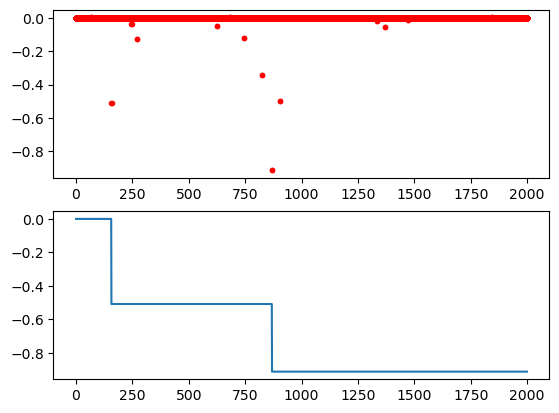

In [45]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [46]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.easom, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-1,0.2)], label=['x-axis', 'y-axis', 'z-axis'])

In [48]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(3.1415, 3.1415, -1))

animation2D.save('easom.gif', writer='ffmpeg', fps=20)

In [49]:
Image(url='easom.gif')

In [50]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[-35.64496143 -70.33926158   0.        ]
  [ 70.04085389  56.58353669  -0.        ]
  [ -8.82914671  84.7555767   -0.        ]
  ...
  [-42.88889026 -31.70037348  -0.        ]
  [-16.68186632 -54.5602928   -0.        ]
  [ -6.65902405  91.01674697   0.        ]]

 [[-27.85504696  19.83167238   0.        ]
  [ 38.00834049 -25.81874997  -0.        ]
  [ 86.58342878 -33.40966954   0.        ]
  ...
  [ 36.04345113  39.81310554  -0.        ]
  [ 37.09647179   9.41314412   0.        ]
  [-32.53644162 -35.06077      0.        ]]

 [[-27.85504696  19.83167238   0.        ]
  [ 38.00834049 -25.81874997  -0.        ]
  [ 86.58342878 -33.40966954   0.        ]
  ...
  [ 36.04345113  39.81310554  -0.        ]
  [ 37.09647179   9.41314412   0.        ]
  [-32.53644162 -35.06077      0.        ]]

 ...

 [[  8.08904303  72.85932236  -0.        ]
  [-57.95587815  18.16834027  -0.        ]
  [-74.73453853  77.85083754   0.        ]
  ...
  [-64.54235485  64.0766834    0.        ]
  [-79.61942926  3

In [51]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(3.1415, 3.1415, -1))
plt.show()


In [52]:
animation3d.save('easom_3d.gif', writer='ffmpeg', fps=15)
Image(url='easom_3d.gif')

Sphere  objective function

    Has a global minimum at :code:`0` and with a search domain of
        :code:`[-inf, inf]`

In [53]:
ho = PSO_GA(example_funcs.sphere, n_dim=2, lb=[-5., -5.], ub = [5., 5.], max_iter=500)
ho.record_mode = True
ho.run()

(array([-0.00110643,  0.00898581]), array([8.19689523e-05]))

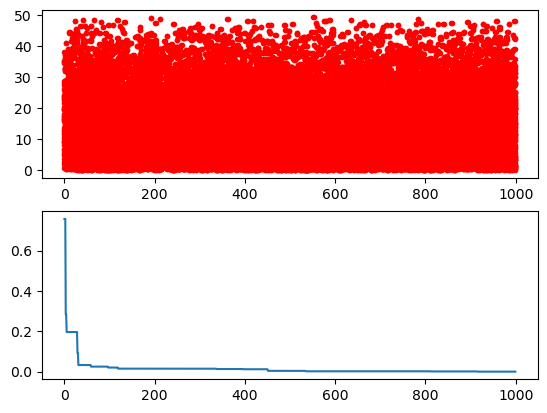

In [54]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [55]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=example_funcs.ps_sphere)
#Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

In [56]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(0, 0, 0))

animation2D.save('sphere.gif', writer='ffmpeg', fps=20)

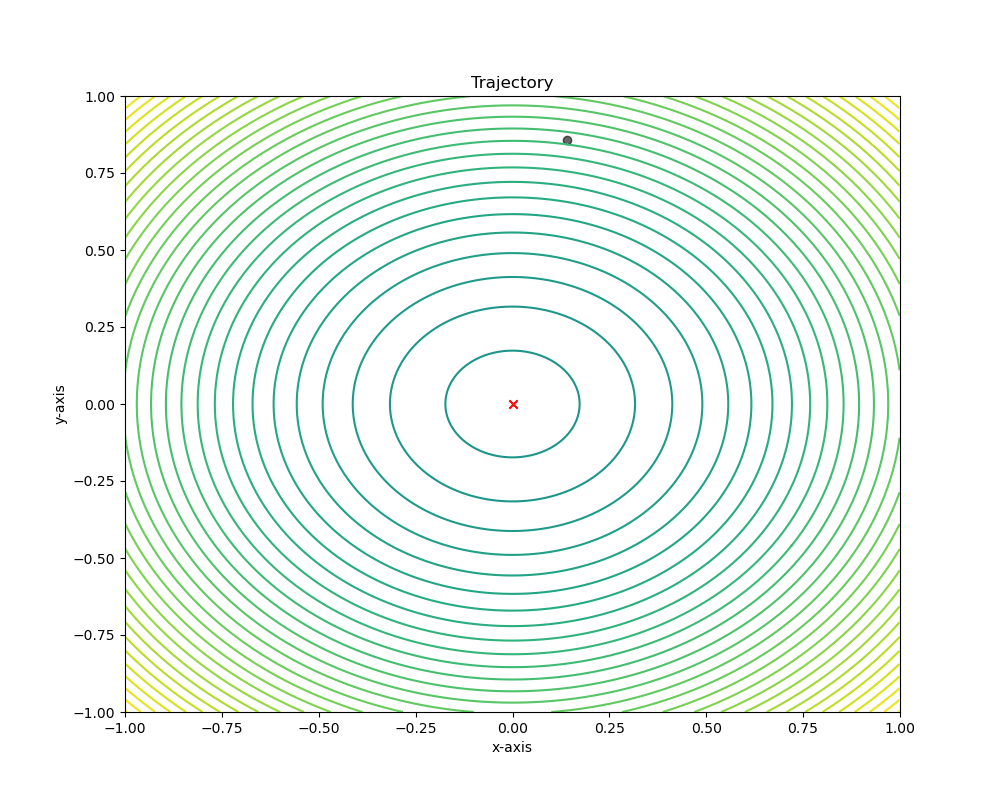

In [57]:
Image('sphere.gif')

In [58]:
%%capture
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d,  mark=(0, 0, 0))

In [60]:
animation3d.save('sphere_3d.gif', writer='ffmpeg', fps=20)
Image(url='sphere_3d.gif')

Styblinski-Tang's  objective function

    -5 to 5 with global minimum of -39.16599*n_dim at (-2.903534,...,-2.903534)'''
    Its coordinates are bounded within :code:`[-5,5]`.

    Best visualized with the full domain and a range of :code:`[-100,250]`

best_x is  [-2.90360926 -1.49109324] best_y is [-39.16616561]


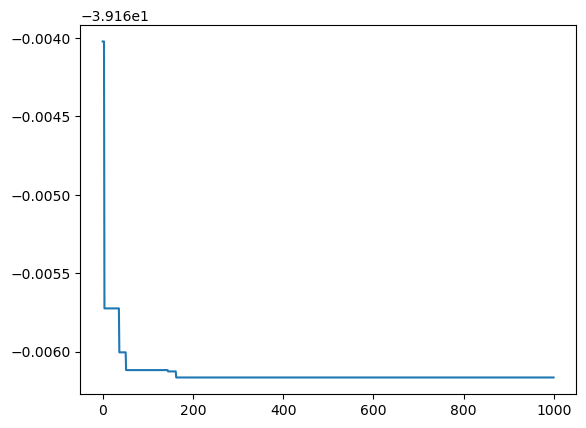

In [70]:
ho = PSO_GA(example_funcs.styblinski_tang, n_dim=2, lb=[-5., -5.], ub = [5., 5.], max_iter=1000)
ho.record_mode = True
ho.run()
print('best_x is ', ho.gbest_x, 'best_y is', ho.gbest_y)
plt.plot(ho.gbest_y_hist)
plt.show()

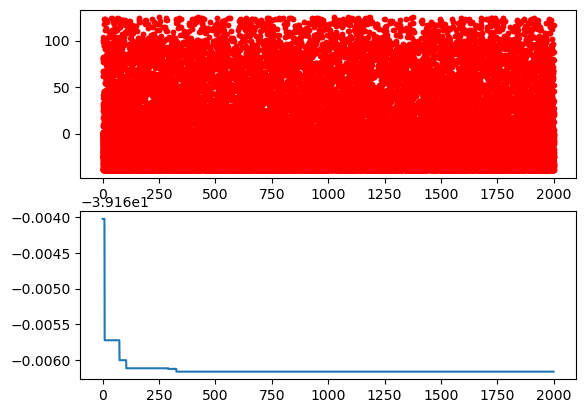

In [71]:
import pandas as pd

Y_history = pd.DataFrame(np.array(ho.record_value['Y']).reshape((-1, ho.size_pop)))
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [73]:
from plotters import plot_cost_history, plot_contour, plot_surface, Mesher, Designer
#Plot the sphere function's mesh for better plots
m = Mesher(func=ho.func, limits=[(-5,5), (-5,5)])
#Adjust figure limits
d = Designer(limits=[(-5,5), (-5,5), (-100,250)], label=['x-axis', 'y-axis', 'z-axis'])

In [74]:
%%capture

#Make animation
animation2D = plot_contour(pos_history=ho.record_value['X'], mesher=m, designer=d, mark=(-2.903534, -2.903534, -39.16599))

animation2D.save('styblinski_tang.gif', writer='ffmpeg', fps=20)

In [75]:
Image(url='styblinski_tang.gif')

In [76]:
pos_history_3d = m.compute_history_3d(ho.record_value['X']) #preprocessing
print(str(pos_history_3d))

[[[-3.37245493e+00  1.89597141e+00 -3.47410473e+01]
  [ 1.89228640e+00 -6.51732740e-01 -1.75043890e+01]
  [ 1.51678013e+00 -8.62078569e-01 -1.19665947e+01]
  ...
  [ 4.00879027e+00 -2.63599940e+00  1.05876491e+01]
  [ 6.02609444e-01 -1.28035504e+00 -1.33264687e+00]
  [ 8.91004185e-01  3.84352670e+00 -3.80846776e+00]]

 [[ 4.66126530e-01 -1.76126785e+00 -5.49271226e-01]
  [-2.45116616e-01  4.22187028e+00 -1.09164385e+00]
  [ 4.60752798e+00 -3.77191785e+00  6.70261954e+01]
  ...
  [-7.19479757e-01 -2.00836839e-01 -5.80592701e+00]
  [-4.42868612e+00  1.97739539e+00  2.43621977e+01]
  [-2.63977581e-01 -3.39630011e-02 -1.21498932e+00]]

 [[ 4.66126530e-01 -1.76126785e+00 -5.49271226e-01]
  [-2.45116616e-01  4.22187028e+00 -1.09164385e+00]
  [ 4.60752798e+00 -3.77191785e+00  6.70261954e+01]
  ...
  [-7.19479757e-01 -2.00836839e-01 -5.80592701e+00]
  [-4.42868612e+00  1.97739539e+00  2.43621977e+01]
  [-2.63977581e-01 -3.39630011e-02 -1.21498932e+00]]

 ...

 [[-1.02323984e+00 -1.05459322e+00

In [77]:
%%capture

animation3d = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(-2.903534, -2.903534, -39.16599))
plt.show()


In [78]:
animation3d.save('styblinski_tang_3d.gif', writer='ffmpeg', fps=15)
Image(url='styblinski_tang_3d.gif')